In [20]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [21]:
d = pd.read_csv("D:\ggg\clg\Documents\SEM 3\Data Science\Projects\Ex-04-Multivariate-Analysis\SuperStore.csv")
d.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [22]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [23]:
d.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [24]:
d.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [25]:
d['Postal Code'] = d["Postal Code"].fillna(d['Postal Code'].mode()[0])

In [26]:
d.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Postal Code', ylabel='Sales'>

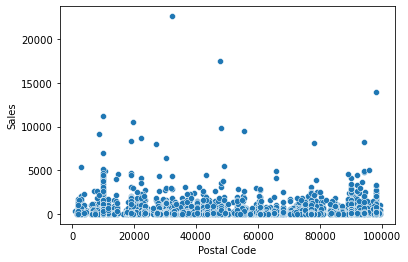

In [27]:
sbn.scatterplot(d['Postal Code'],d['Sales'])

In [28]:
states=d.loc[:,["State","Sales"]]
states.head()

,State,Sales
0,Kentucky,261.9600
1,Kentucky,731.9400
2,California,14.6200
3,Florida,957.5775
4,Florida,22.3680


<AxesSubplot:xlabel='State', ylabel='Sales'>

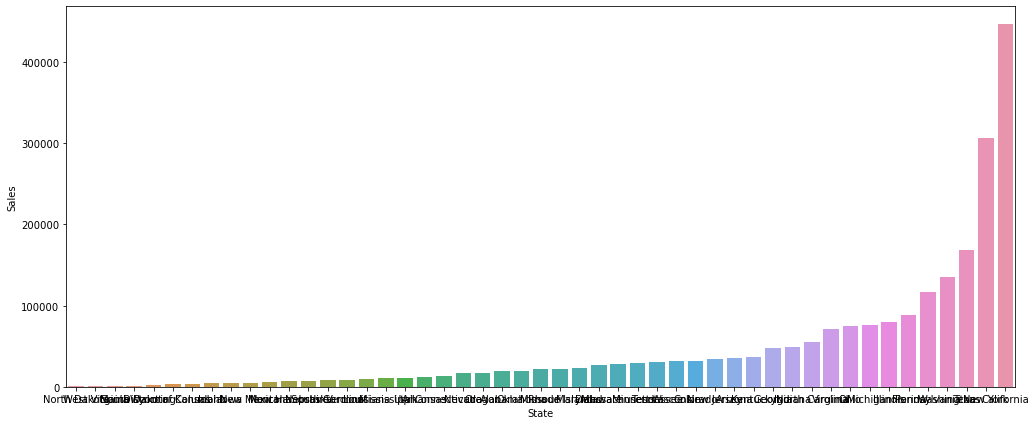

In [29]:
states=states.groupby(by=["State"]).sum().sort_values(by="Sales")
plt.figure(figsize=(17,7))
sbn.barplot(x=states.index,y="Sales",data=states)

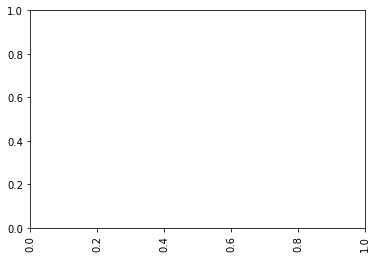

In [30]:
plt.xticks(rotation = 90)
plt.xlabel=("STATES")
plt.ylabel=("SALES")
plt.show()

In [31]:
states=d.loc[:,["State","Postal Code"]]
states.head()

,State,Postal Code
0,Kentucky,42420.0
1,Kentucky,42420.0
2,California,90036.0
3,Florida,33311.0
4,Florida,33311.0


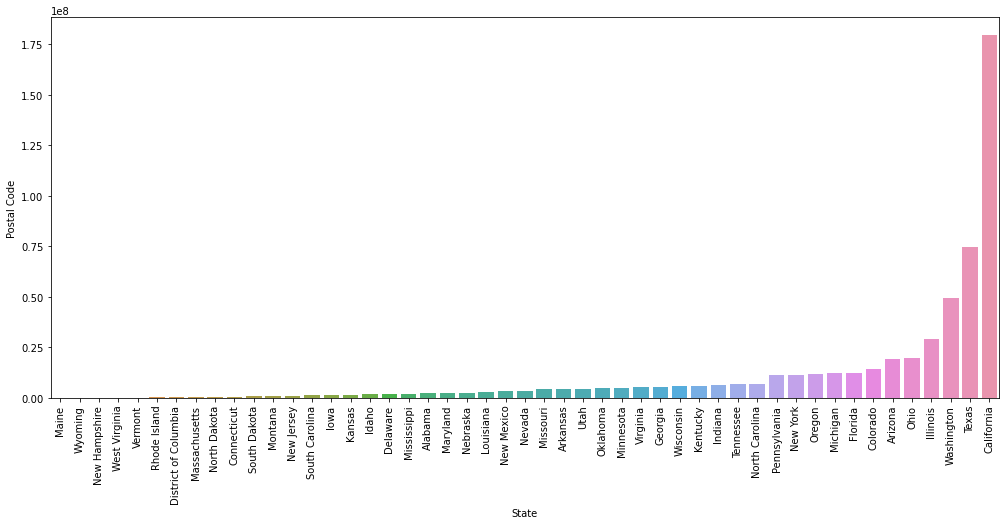

In [32]:
states=states.groupby(by=["State"]).sum().sort_values(by="Postal Code")
plt.figure(figsize=(17,7))
sbn.barplot(x=states.index,y="Postal Code",data=states)
plt.xticks(rotation = 90)
plt.xlabel=("STATES")
plt.ylabel=("Postal Code")
plt.show()

In [33]:
states=d.loc[:,["Segment","Sales"]]
states.head()

,Segment,Sales
0,Consumer,261.9600
1,Consumer,731.9400
2,Corporate,14.6200
3,Consumer,957.5775
4,Consumer,22.3680


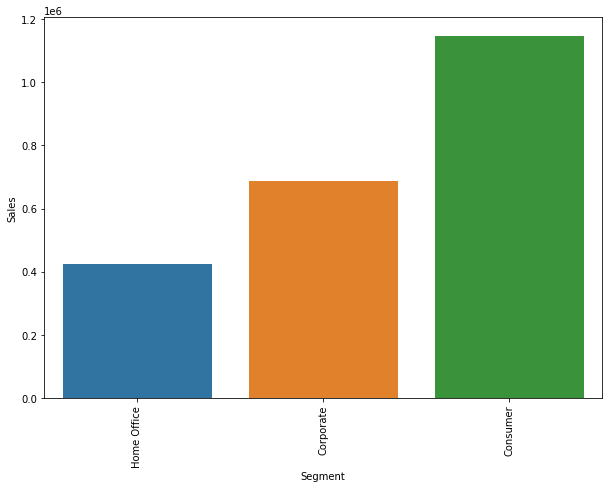

In [34]:
states=states.groupby(by=["Segment"]).sum().sort_values(by="Sales")
plt.figure(figsize=(10,7))
sbn.barplot(x=states.index,y="Sales",data=states)
plt.xticks(rotation = 90)
plt.xlabel=("SEGMENT")
plt.ylabel=("SALES")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Postal Code', ylabel='Ship Mode'>

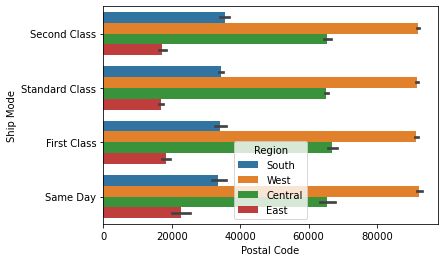

In [36]:
sbn.barplot(d['Postal Code'],d['Ship Mode'],hue=d['Region'])

In [37]:
d.corr()

,Row ID,Postal Code,Sales
Row ID,1.000000,0.011723,0.001151
Postal Code,0.011723,1.000000,-0.025444
Sales,0.001151,-0.025444,1.000000


<AxesSubplot:>

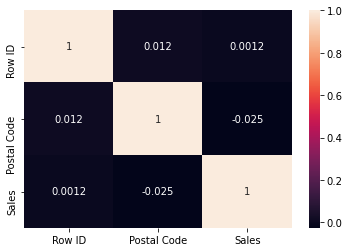

In [38]:
sbn.heatmap(d.corr(),annot=True)